In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset


In [352]:
# display all column and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [353]:
df = pd.read_csv("/content/data_version_2.csv")

In [354]:
df.head()

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
0,0,48022756,Rawalpindi,NaN,5.0,6.0,1.0,2.0,0.0,7.50,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,5445.0,13774.10,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses
1,1,51560745,Rawalpindi,NaN,5.0,6.0,1.0,2.0,0.0,3.75,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,2968.0,12634.77,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses
2,2,51815448,Rawalpindi,NaN,5.0,6.0,1.0,2.0,0.0,4.25,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Undefined,2722.0,15613.52,Bahria Town Phase 4,Punjab,Bahria Town Rawalpindi,Houses
3,3,52061409,Rawalpindi,1.0,3.0,3.0,0.0,1.0,0.0,1.50,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,1361.0,11021.31,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses
4,4,52010487,Rawalpindi,3.0,6.0,6.0,1.0,2.0,1.0,4.75,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",New Property,3812.0,12460.65,Bahria Greens,Punjab,Bahria Town Rawalpindi,Houses


In [355]:
print(df.dtypes)

Unnamed: 0            int64
House Number          int64
City                 object
Parking Spaces      float64
Bedrooms            float64
Bathrooms           float64
Servant Quarters    float64
Kitchens            float64
Store Rooms         float64
price               float64
Purpose              object
Location             object
Age Possession       object
area                float64
price_per_sqft      float64
colony               object
province             object
society              object
property Type        object
dtype: object


### price

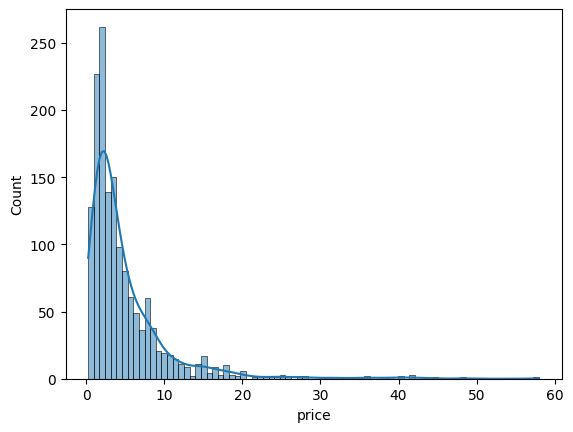

In [356]:
sns.histplot(data=df, x="price", kde=True)
plt.show()

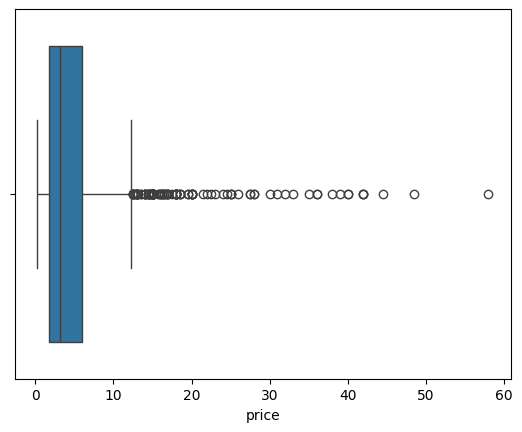

In [357]:
sns.boxplot(data=df, x="price")
plt.show()

In [358]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(112,
 count    112.000000
 mean      20.465089
 std        9.155756
 min       12.500000
 25%       14.787500
 50%       16.800000
 75%       22.587500
 max       58.000000
 Name: price, dtype: float64)

In [359]:
outliers.sort_values('price',ascending=False).head(20)

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
968,968,51996256,Lahore,6.0,7.0,10.0,4.0,3.0,0.0,58.0,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,10890.0,53259.87,DHA Phase 6,Punjab,DHA Defence,Houses
902,902,51989216,Lahore,6.0,6.0,7.0,2.0,2.0,2.0,48.5,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,10890.0,44536.27,DHA Phase 6,Punjab,DHA Defence,Houses
1008,1008,52112035,Lahore,6.0,6.0,7.0,2.0,3.0,2.0,44.5,For Sale,"DHA Defence, Lahore, Punjab,",Under Construction,11979.0,37148.34,DHA Phase 6,Punjab,DHA Defence,Houses
1452,1452,52067954,Karachi,NaN,6.0,7.0,1.0,1.0,1.0,42.0,NaN,"DHA Defence, Karachi, Sindh,",Undefined,NaN,NaN,DHA Phase 8,Sindh,DHA Defence,Houses
1356,1356,51944562,Karachi,6.0,6.0,7.0,0.0,0.0,0.0,42.0,NaN,"DHA Defence, Karachi, Sindh,",Relatively New,NaN,NaN,DHA Phase 8,Sindh,DHA Defence,Houses
1418,1418,52077185,Karachi,8.0,6.0,7.0,2.0,2.0,2.0,42.0,NaN,"DHA Defence, Karachi, Sindh,",Under Construction,NaN,NaN,DHA Phase 8,Sindh,DHA Defence,Houses
1507,1507,51859090,Karachi,3.0,1.0,2.0,1.0,1.0,1.0,40.0,NaN,"DHA Defence, Karachi, Sindh,",Relatively New,NaN,NaN,Khayaban,Sindh,DHA Defence,Houses
1289,1289,52067692,Karachi,1.0,6.0,7.0,1.0,1.0,2.0,40.0,NaN,"DHA Defence, Karachi, Sindh,",Relatively New,NaN,NaN,DHA Phase 7,Sindh,DHA Defence,Houses
1173,1173,52057225,Lahore,60.0,7.0,8.0,2.0,3.0,0.0,39.0,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,10890.0,35812.67,DHA Phase 6,Punjab,DHA Defence,Houses
954,954,52093553,Lahore,NaN,6.0,8.0,3.0,5.0,3.0,38.0,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,10890.0,34894.40,DHA Phase 6,Punjab,DHA Defence,Houses


## Assumption
- on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### price_per_sqft

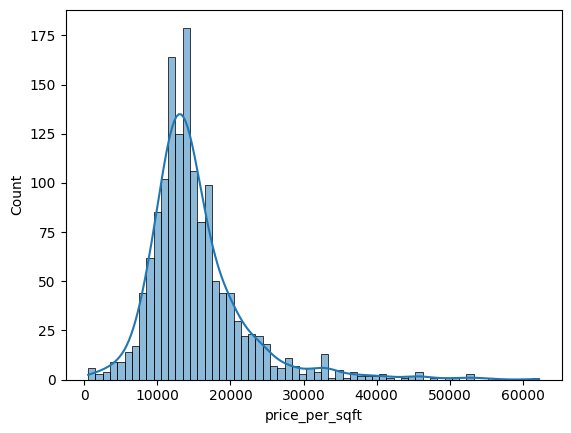

In [360]:
sns.histplot(data=df, x="price_per_sqft", kde=True)
plt.show()

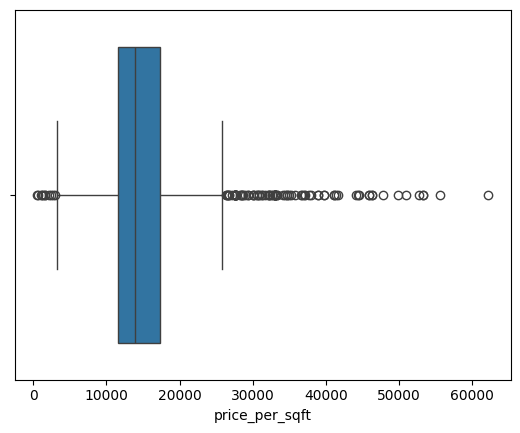

In [361]:
sns.boxplot(data=df, x="price_per_sqft")
plt.show()

In [362]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(98,
 count       98.000000
 mean     31396.542653
 std      12995.814095
 min        550.960000
 25%      27624.592500
 50%      32314.815000
 75%      37601.482500
 max      62222.220000
 Name: price_per_sqft, dtype: float64)

In [363]:
outliers_sqft.sort_values('price_per_sqft',ascending=False).head(20)

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
1443,1443,52007084,Karachi,NaN,4.0,5.0,1.0,1.0,1.0,5.60,For Sale,"DHA Defence, Karachi, Sindh,",Undefined,900.0,62222.22,DHA Phase 8,Sindh,DHA Defence,Houses
1497,1497,52035954,Karachi,NaN,5.0,6.0,0.0,0.0,0.0,20.00,For Sale,"DHA Defence, Karachi, Sindh,",Undefined,3600.0,55555.56,DHA Phase 5,Sindh,DHA Defence,Houses
968,968,51996256,Lahore,6.0,7.0,10.0,4.0,3.0,0.0,58.00,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,10890.0,53259.87,DHA Phase 6,Punjab,DHA Defence,Houses
1258,1258,52074321,Karachi,4.0,11.0,11.0,2.0,3.0,0.0,11.50,For Sale,Gulshan,Relatively New,2160.0,53240.74,Gulshan,Sindh,Gulshan,Houses
1441,1441,52024226,Karachi,2.0,4.0,4.0,1.0,1.0,1.0,4.75,For Sale,"DHA Defence, Karachi, Sindh,",Undefined,900.0,52777.78,DHA Phase 7,Sindh,DHA Defence,Houses
1484,1484,51266256,Karachi,NaN,10.0,11.0,0.0,0.0,0.0,11.00,For Sale,Gulshan,Relatively New,2160.0,50925.93,Gulshan,Sindh,Gulshan,Houses
1242,1242,52144273,Karachi,3.0,5.0,6.0,3.0,2.0,2.0,22.45,For Sale,"DHA Defence, Karachi, Sindh,",Relatively New,4500.0,49888.89,DHA Phase 8,Sindh,DHA Defence,Houses
1468,1468,52124832,Karachi,3.0,5.0,5.0,2.0,2.0,1.0,21.50,For Sale,"DHA Defence, Karachi, Sindh,",Relatively New,4500.0,47777.78,DHA Phase 8,Sindh,DHA Defence,Houses
1423,1423,52073735,Karachi,NaN,7.0,5.0,1.0,3.0,2.0,20.00,For Sale,"Tariq Road, Karachi, Sindh,",Undefined,4320.0,46296.30,Tariq Road,Sindh,Tariq Road,Houses
1496,1496,48978649,Karachi,NaN,8.0,10.0,0.0,2.0,1.0,12.50,For Sale,"DHA Defence, Karachi, Sindh,",Relatively New,2700.0,46296.30,DHA Phase 4,Sindh,DHA Defence,Houses


In [364]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

<ipython-input-364-8c5ad871d258>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [365]:
# 10000000
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

<ipython-input-365-1665d4e65fb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [366]:
outliers_sqft['price_per_sqft'].describe()

,price_per_sqft
count,98.000000
mean,29241.755102
std,13935.029321
min,551.000000
25%,27548.000000
50%,31943.000000
75%,36711.250000
max,55556.000000


In [367]:
df.update(outliers_sqft)

In [368]:
df[df['price_per_sqft']>40000]

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
157,157,50811402,Rawalpindi,NaN,6.0,8.0,0.0,3.0,0.0,4.50,For Sale,"Satellite Town, Rawalpindi, Punjab,",Relatively New,1089.0,41322.0,Satellite Town,Punjab,Satellite Town,Houses
604,604,51040739,Lahore,4.0,6.0,7.0,2.0,2.0,2.0,25.00,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,5445.0,45914.0,DHA Phase 6,Punjab,DHA Defence,Houses
750,750,52005786,Lahore,3.0,6.0,6.0,1.0,2.0,1.0,24.00,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,5445.0,44077.0,DHA Phase 6,Punjab,DHA Defence,Houses
902,902,51989216,Lahore,6.0,6.0,7.0,2.0,2.0,2.0,48.50,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,10890.0,44536.0,DHA Phase 6,Punjab,DHA Defence,Houses
968,968,51996256,Lahore,6.0,7.0,10.0,4.0,3.0,0.0,58.00,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,10890.0,53260.0,DHA Phase 6,Punjab,DHA Defence,Houses
1242,1242,52144273,Karachi,3.0,5.0,6.0,3.0,2.0,2.0,22.45,For Sale,"DHA Defence, Karachi, Sindh,",Relatively New,4500.0,49889.0,DHA Phase 8,Sindh,DHA Defence,Houses
1255,1255,51879732,Karachi,3.0,2.0,3.0,1.0,1.0,1.0,14.00,For Sale,"Navy Housing Scheme Karsaz, Karachi, Sindh,",New Property,3150.0,44444.0,Navy Housing Scheme Karsaz,Sindh,Navy Housing Scheme Karsaz,Houses
1258,1258,52074321,Karachi,4.0,11.0,11.0,2.0,3.0,0.0,11.50,For Sale,Gulshan,Relatively New,2160.0,53241.0,Gulshan,Sindh,Gulshan,Houses
1279,1279,52013288,Karachi,NaN,6.0,6.0,0.0,0.0,0.0,18.50,For Sale,"DHA Defence, Karachi, Sindh,",Relatively New,4500.0,41111.0,DHA Phase 6,Sindh,DHA Defence,Houses
1290,1290,52098914,Karachi,4.0,8.0,0.0,2.0,2.0,3.0,15.00,For Sale,"Naya Nazimabad, Karachi, Sindh,",Relatively New,3600.0,41667.0,Naya Nazimabad,Sindh,Naya Nazimabad,Houses


In [369]:
df=df[df['price_per_sqft']<=40000]

<Axes: xlabel='price_per_sqft'>

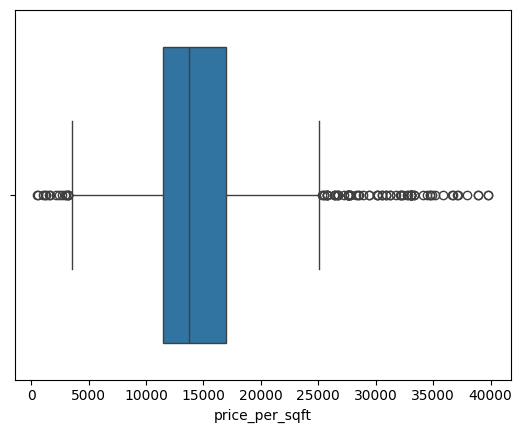

In [370]:
sns.boxplot(x=df['price_per_sqft'])

### area

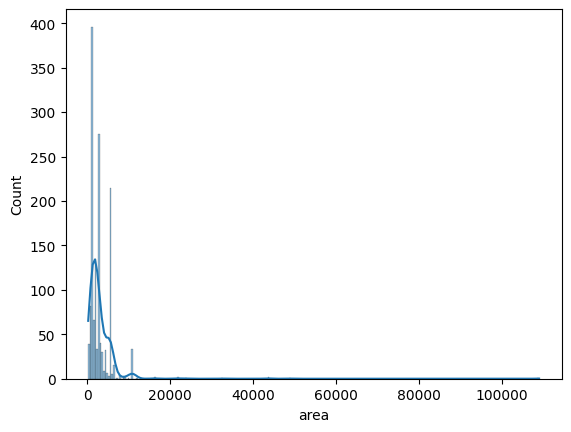

In [371]:
sns.histplot(data=df, x="area", kde=True)
plt.show()

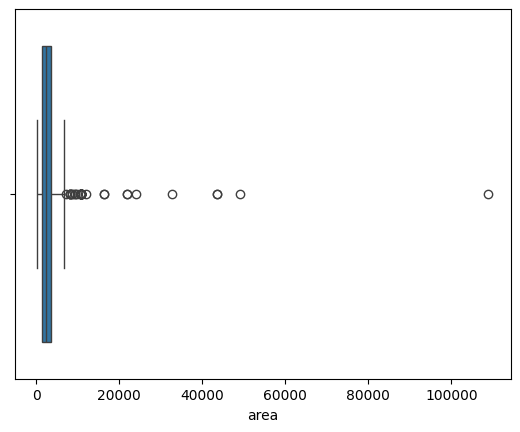

In [372]:
sns.boxplot(data=df, x="area")
plt.show()

In [373]:
df['area'].describe()

,area
count,1437.000000
mean,3081.075852
std,4184.031108
min,279.000000
25%,1361.000000
50%,2304.000000
75%,3600.000000
max,108900.000000


In [374]:
df[df['area']>12000]

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
576,576,52093607,NaN,NaN,4.0,4.0,0.0,2.0,1.0,4.0,For Sale,"Bedian Road, Lahore, Punjab,",Relatively New,32670.0,1224.00,Bedian Road,Punjab,Bedian Road,NaN
584,584,51822957,NaN,1.0,3.0,3.0,1.0,1.0,1.0,7.0,For Sale,"Bedian Road, Lahore, Punjab,",New Property,16335.0,4285.28,Bedian Road,Punjab,Bedian Road,NaN
586,586,51906700,NaN,10.0,4.0,5.0,2.0,1.0,1.0,4.6,For Sale,"Bedian Road, Lahore, Punjab,",Relatively New,43560.0,1056.00,Bedian Road,Punjab,Bedian Road,NaN
587,587,51906969,NaN,1.0,2.0,3.0,1.0,1.0,1.0,10.5,For Sale,"Bedian Road, Lahore, Punjab,",Relatively New,43560.0,2410.00,Bedian Road,Punjab,Bedian Road,NaN
603,603,51896092,NaN,2.0,2.0,3.0,2.0,1.0,0.0,3.5,For Sale,"Bedian Road, Lahore, Punjab,",Undefined,21780.0,1607.00,Bedian Road,Punjab,Bedian Road,NaN
819,819,51899118,NaN,NaN,6.0,5.0,1.0,1.0,1.0,4.8,For Sale,"Bedian Road, Lahore, Punjab,",Relatively New,21780.0,2204.00,Bedian Road,Punjab,Bedian Road,NaN
904,904,49853715,NaN,1.0,4.0,4.0,1.0,1.0,0.0,7.5,For Sale,"Bedian Road, Lahore, Punjab,",Relatively New,49005.0,1530.00,Bedian Road,Punjab,Bedian Road,NaN
1149,1149,52057121,Lahore,6.0,7.0,8.0,1.0,3.0,0.0,35.0,For Sale,"Model Town, Lahore, Punjab,",Relatively New,16335.0,21426.39,Model Town,Punjab,Model Town,Houses
1152,1152,51833076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,For Sale,Lahore,Undefined,108900.0,551.00,Lahore,Punjab,Lahore,NaN
1208,1208,47755274,Lahore,10.0,2.0,6.0,1.0,3.0,1.0,28.0,For Sale,"Model Town, Lahore, Punjab,",Old Property,23958.0,11687.12,Model Town,Punjab,Model Town,Houses


In [375]:
df[df['area']>12000][['price','price_per_sqft','area']].sort_values('area',ascending=False)

,price,price_per_sqft,area
1152,6.0,551.00,108900.0
904,7.5,1530.00,49005.0
586,4.6,1056.00,43560.0
587,10.5,2410.00,43560.0
576,4.0,1224.00,32670.0
1208,28.0,11687.12,23958.0
603,3.5,1607.00,21780.0
819,4.8,2204.00,21780.0
584,7.0,4285.28,16335.0
1149,35.0,21426.39,16335.0


In [376]:
df=df[df['area']<=12000]

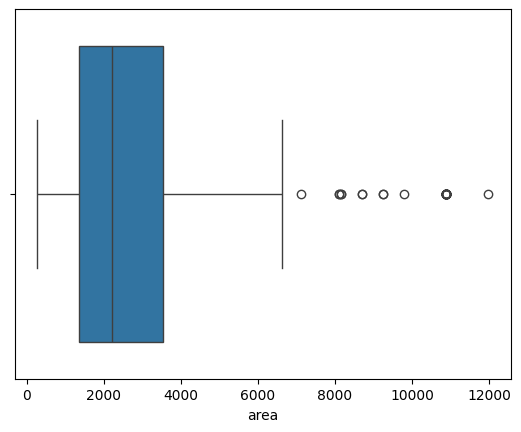

In [377]:
sns.boxplot(data=df, x="area")
plt.show()
#

## Bedrooms

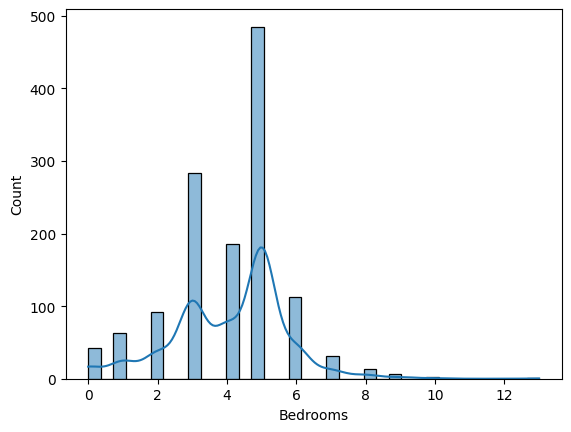

In [378]:
sns.histplot(data=df, x="Bedrooms", kde=True)
plt.show()

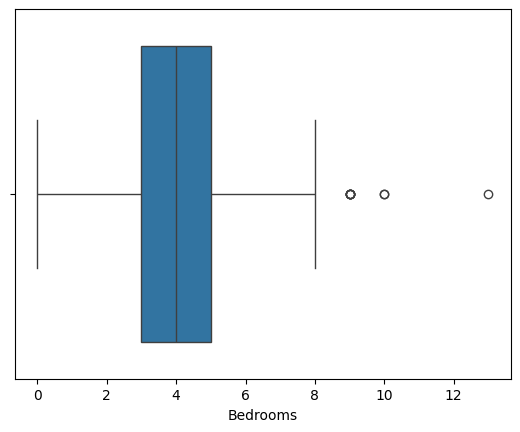

In [379]:
sns.boxplot(data=df, x="Bedrooms")
plt.show()

In [380]:
df[df['Bedrooms']>10]

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
1375,1375,51725537,Karachi,6.0,13.0,13.0,1.0,4.0,4.0,8.6,For Sale,Gulistan,New Property,3600.0,23888.89,Sindh Baloch Housing Society,Sindh,Gulistan,Houses


In [381]:
df=df[df['Bedrooms']<=10]

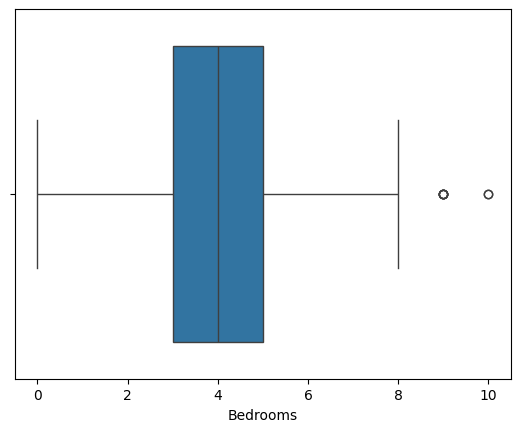

In [382]:
sns.boxplot(data=df, x="Bedrooms")
plt.show()

### Bathrooms

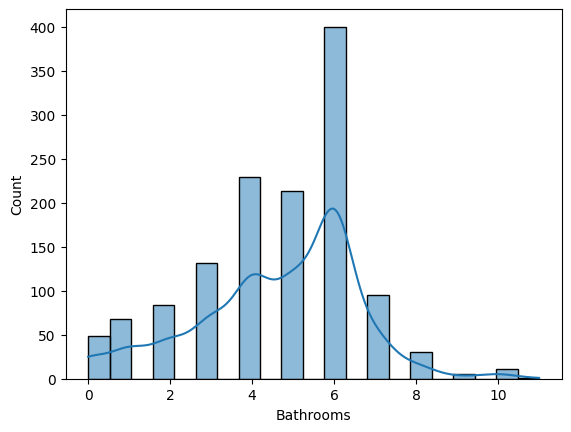

In [383]:
sns.histplot(data=df, x="Bathrooms", kde=True)
plt.show()

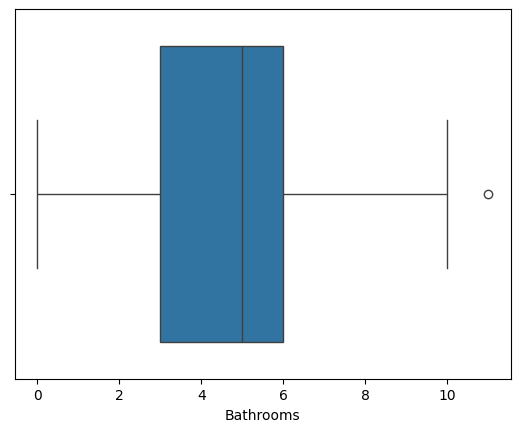

In [384]:
sns.boxplot(data=df, x="Bathrooms")
plt.show()

In [385]:
df[df['Bathrooms']>10]

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
863,863,50280209,Lahore,4.0,10.0,11.0,2.0,4.0,2.0,14.0,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,5445.0,25711.66,DHA Phase 5,Punjab,DHA Defence,Houses


In [386]:
df.head()

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
0,0,48022756,Rawalpindi,NaN,5.0,6.0,1.0,2.0,0.0,7.50,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,5445.0,13774.10,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses
1,1,51560745,Rawalpindi,NaN,5.0,6.0,1.0,2.0,0.0,3.75,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,2968.0,12634.77,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses
2,2,51815448,Rawalpindi,NaN,5.0,6.0,1.0,2.0,0.0,4.25,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Undefined,2722.0,15613.52,Bahria Town Phase 4,Punjab,Bahria Town Rawalpindi,Houses
3,3,52061409,Rawalpindi,1.0,3.0,3.0,0.0,1.0,0.0,1.50,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,1361.0,11021.31,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses
4,4,52010487,Rawalpindi,3.0,6.0,6.0,1.0,2.0,1.0,4.75,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",New Property,3812.0,12460.65,Bahria Greens,Punjab,Bahria Town Rawalpindi,Houses


## kitchen

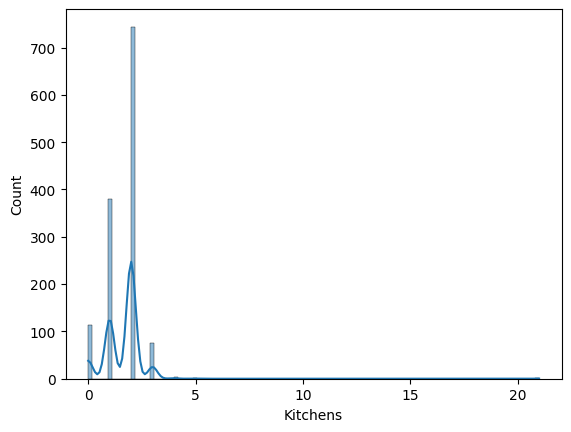

In [387]:
sns.histplot(data=df, x="Kitchens", kde=True)
plt.show()

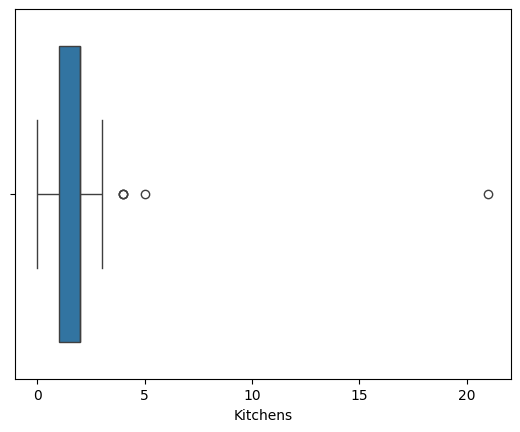

In [388]:
sns.boxplot(data=df, x="Kitchens")
plt.show()

In [389]:
df[df['Kitchens']>3]

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
165,165,52100022,Rawalpindi,3.0,6.0,7.0,1.0,4.0,2.0,4.25,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Under Construction,2450.0,17346.94,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses
297,297,50170542,Rawalpindi,5.0,6.0,7.0,2.0,4.0,1.0,7.40,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,6534.0,11325.37,Bahria Greens,Punjab,Bahria Town Rawalpindi,Houses
863,863,50280209,Lahore,4.0,10.0,11.0,2.0,4.0,2.0,14.00,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,5445.0,25711.66,DHA Phase 5,Punjab,DHA Defence,Houses
954,954,52093553,Lahore,NaN,6.0,8.0,3.0,5.0,3.0,38.00,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,10890.0,34894.00,DHA Phase 6,Punjab,DHA Defence,Houses
1193,1193,51439273,Lahore,3.0,7.0,7.0,1.0,21.0,2.0,3.10,For Sale,"Formanites Housing Scheme, Lahore, Punjab,",Relatively New,2722.0,11388.68,Formanites Housing Scheme,Punjab,Formanites Housing Scheme,Houses


In [390]:
df=df[df['Kitchens']<=3]

In [391]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

<ipython-input-391-b63ef8b8d795>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = round((df['price']*10000000)/df['area'])


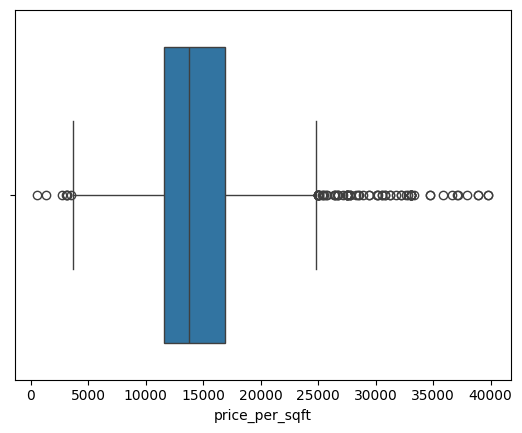

In [392]:
sns.boxplot(data=df, x="price_per_sqft")
plt.show()

In [393]:
df[df['price_per_sqft']>35000]

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
452,452,43639626,Rawalpindi,4.0,5.0,5.0,3.0,2.0,2.0,26.00,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,6534.0,39792.0,Bahria Intellectual Village,Punjab,Bahria Town Rawalpindi,Houses
1008,1008,52112035,Lahore,6.0,6.0,7.0,2.0,3.0,2.0,44.50,For Sale,"DHA Defence, Lahore, Punjab,",Under Construction,11979.0,37148.0,DHA Phase 6,Punjab,DHA Defence,Houses
1173,1173,52057225,Lahore,60.0,7.0,8.0,2.0,3.0,0.0,39.00,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,10890.0,35813.0,DHA Phase 6,Punjab,DHA Defence,Houses
1269,1269,50792559,Karachi,1.0,4.0,5.0,2.0,2.0,0.0,7.00,For Sale,"Jamshed Town, Karachi, Sindh,",Moderately Old,1800.0,38889.0,PECHS Block 2,Sindh,Jamshed Town,Houses
1310,1310,51805050,Karachi,3.0,7.0,7.0,0.0,1.0,1.0,16.50,For Sale,"DHA Defence, Karachi, Sindh,",Undefined,4500.0,36667.0,DHA Phase 8,Sindh,DHA Defence,Houses
1346,1346,52098384,Karachi,3.0,6.0,7.0,0.0,2.0,2.0,4.00,For Sale,Gulistan,Relatively New,1080.0,37037.0,Gulistan,Sindh,Gulistan,Houses
1355,1355,48087106,Karachi,1.0,2.0,2.0,1.0,1.0,1.0,5.40,For Sale,"DHA Defence, Karachi, Sindh,",Undefined,1422.0,37975.0,HMR Waterfront,Sindh,DHA Defence,Flats
1368,1368,42475075,Karachi,2.0,4.0,5.0,1.0,1.0,1.0,12.75,For Sale,"DHA Defence, Karachi, Sindh,",Relatively New,3204.0,39794.0,Emaar Panorama,Sindh,DHA Defence,Flats
1506,1506,52142911,Karachi,2.0,8.0,9.0,1.0,2.0,2.0,14.00,For Sale,Gulshan,Under Construction,3600.0,38889.0,Gulshan,Sindh,Gulshan,Houses


In [394]:
# 1269 ,1310

In [395]:
df.to_csv('data_version_3.csv',index=False)